In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss

In [13]:
dtypes = {'issue_d': 'str', 'last_pymnt_d': 'str'}
parse_dates = ['issue_d', 'last_pymnt_d']
accepted = pd.read_csv('accepted_b_2015_clean.csv',
                       dtype=dtypes, parse_dates=parse_dates)

## Checking intrest rate distribution and defining bins

(array([11306., 10217.,  6046., 26092.,  9737., 19927., 21968.,  8118.,
        27870., 28917., 19041., 44239., 32500., 24096., 27699., 23443.,
        14260., 20481., 12389., 12881., 11145.,  9656.,  6237.,  3109.,
         6457.,  2954.,  4475.,  3554.,  1983.,  2850.]),
 array([ 5.42 ,  6.108,  6.796,  7.484,  8.172,  8.86 ,  9.548, 10.236,
        10.924, 11.612, 12.3  , 12.988, 13.676, 14.364, 15.052, 15.74 ,
        16.428, 17.116, 17.804, 18.492, 19.18 , 19.868, 20.556, 21.244,
        21.932, 22.62 , 23.308, 23.996, 24.684, 25.372, 26.06 ]),
 <a list of 30 Patch objects>)

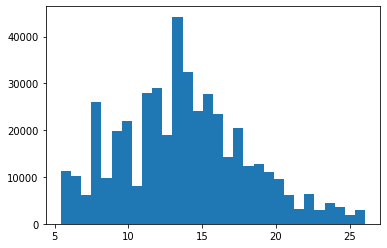

In [217]:
plt.hist(accepted['int_rate'], bins = 30)

In [7]:
int_bins = np.array([5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 30])
accepted['int_bin'] = pd.cut(accepted['int_rate'], int_bins)

In [17]:
accepted[['int_rate', 'int_bin']]

,int_rate,int_bin
0,6.99,"(5.0, 7.5]"
1,12.39,"(10.0, 12.5]"
2,13.66,"(12.5, 15.0]"
3,13.66,"(12.5, 15.0]"
4,15.59,"(15.0, 17.5]"
...,...,...
453642,16.77,"(15.0, 17.5]"
453643,15.27,"(15.0, 17.5]"
453644,15.96,"(15.0, 17.5]"
453645,16.29,"(15.0, 17.5]"


In [33]:
intcounts = accepted.groupby(['int_bin', 'loan_status']).agg({'id':'count'})
intcounts = intcounts.groupby('int_bin').agg({'id':'sum'})

In [24]:
intbincounts = accepted.groupby(['int_bin', 'loan_status']).id.count().unstack()

In [72]:
intbinprop = intbincounts.copy()
intbinprop['Defaulted'] =intbinprop['Defaulted']/intcounts['id']
intbinprop['FullyPaid'] = intbinprop['FullyPaid']/intcounts['id']
intbinprop

loan_status,Defaulted,FullyPaid
int_bin,,
"(5.0, 7.5]",0.039123,0.960877
"(7.5, 10.0]",0.073863,0.926137
"(10.0, 12.5]",0.114810,0.885190
"(12.5, 15.0]",0.170567,0.829433
"(15.0, 17.5]",0.219079,0.780921
"(17.5, 20.0]",0.268815,0.731185
"(20.0, 22.5]",0.317881,0.682119
"(22.5, 25.0]",0.363501,0.636499
"(25.0, 30.0]",0.428666,0.571334


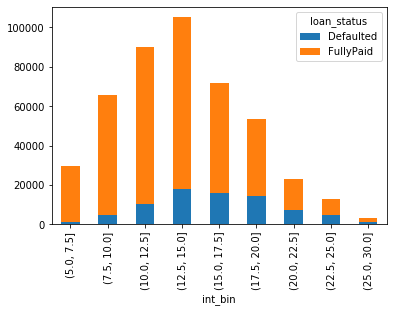

In [25]:
intbincounts.plot(kind='bar', stacked=True)

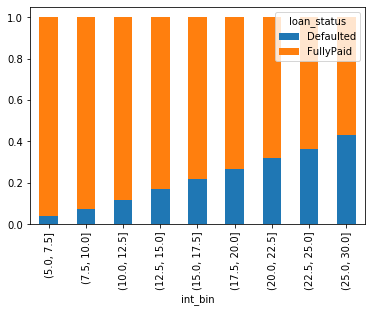

In [73]:
intbinprop.plot(kind='bar', stacked=True)

## Based on this info, defining a safe interest rate as less than 12, and a risky one as more than 20

In [96]:
safeint = 12
riskint = 20

## Defining "fico_mid" as the midpoint between the provided ranges, then repeating the bin-based analysis to define a riskiness threshold

In [75]:
accepted['fico_mid'] = (accepted['fico_range_high'] + accepted['fico_range_low'])/2

(array([1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00,
        3.0000e+00, 9.4000e+01, 1.0500e+02, 1.2500e+02, 1.2400e+02,
        3.6798e+04, 3.7498e+04, 3.8493e+04, 3.5090e+04, 3.5458e+04,
        3.2096e+04, 3.1315e+04, 0.0000e+00, 2.8521e+04, 2.5556e+04,
        2.2927e+04, 1.9534e+04, 1.7522e+04, 1.4908e+04, 1.2042e+04,
        1.0336e+04, 8.2700e+03, 7.2870e+03, 5.7370e+03, 5.4510e+03,
        4.5260e+03, 3.7330e+03, 3.3850e+03, 2.8720e+03, 0.0000e+00,
        2.5560e+03, 2.3530e+03, 1.7630e+03, 1.7280e+03, 1.3090e+03,
        1.1570e+03, 9.3800e+02, 6.6100e+02, 4.5300e+02, 3.4700e+02,
        2.4500e+02, 1.5000e+02, 9.4000e+01, 4.6000e+01, 3.3000e+01]),
 array([612.  , 616.71, 621.42, 626.13, 630.84, 635.55, 640.26, 644.97,
        649.68, 654.39, 659.1 , 663.81, 668.52, 673.23, 677.94, 682.65,
        687.36, 692.07, 696.78, 701.49, 706.2 , 710.91, 715.62, 720.33,
        725.04, 729.75, 734.46, 739.17, 743.88, 748.59, 753.3 , 758.01,
        762.72, 767.43, 772.14

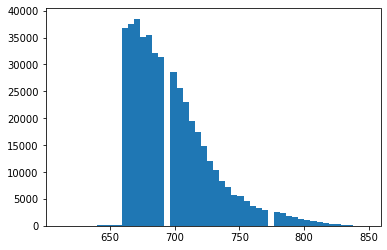

In [78]:
plt.hist(accepted['fico_mid'], bins = 50)

In [83]:
fic_bins = np.array([612, 660, 690, 710, 730, 750, 800, 850])
accepted['fico_bin'] = pd.cut(accepted['fico_mid'], fic_bins)

In [86]:
ficocounts = accepted.groupby(['fico_bin', 'loan_status']).agg({'id':'count'})
ficocounts = ficocounts.groupby('fico_bin').agg({'id':'sum'})


ficobincounts = accepted.groupby(['fico_bin', 'loan_status']).id.count().unstack()

ficobinprop = ficobincounts.copy()
ficobinprop['Defaulted'] = ficobinprop['Defaulted']/ficocounts['id']
ficobinprop['FullyPaid'] = ficobinprop['FullyPaid']/ficocounts['id']
ficobinprop

loan_status,Defaulted,FullyPaid
fico_bin,,
"(612, 660]",0.312227,0.687773
"(660, 690]",0.208575,0.791425
"(690, 710]",0.166444,0.833556
"(710, 730]",0.132144,0.867856
"(730, 750]",0.108599,0.891401
"(750, 800]",0.077099,0.922901
"(800, 850]",0.050921,0.949079


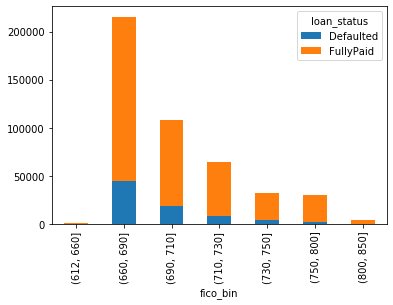

In [87]:
ficobincounts.plot(kind='bar', stacked=True)

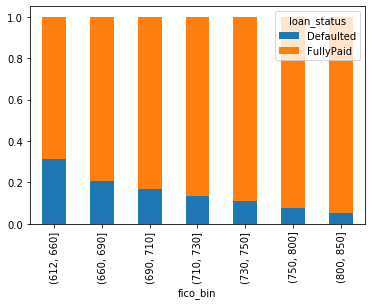

In [88]:
ficobinprop.plot(kind='bar', stacked=True)

In [94]:
riskfico = 700

## Checking default rate per purpose, to identify safe/risky purposes

In [89]:
purposecounts = accepted.groupby(['purpose', 'loan_status']).agg({'id':'count'})
purposecounts = purposecounts.groupby('purpose').agg({'id':'sum'})


purposebincounts = accepted.groupby(['purpose', 'loan_status']).id.count().unstack()

purposeprop = purposebincounts.copy()
purposeprop['Defaulted'] = purposeprop['Defaulted']/purposecounts['id']
purposeprop['FullyPaid'] = purposeprop['FullyPaid']/purposecounts['id']
purposeprop

loan_status,Defaulted,FullyPaid
purpose,,
car,0.119361,0.880639
credit_card,0.143209,0.856791
debt_consolidation,0.180983,0.819017
educational,0.213759,0.786241
home_improvement,0.152479,0.847521
house,0.182954,0.817046
major_purchase,0.141375,0.858625
medical,0.183043,0.816957
moving,0.200949,0.799051


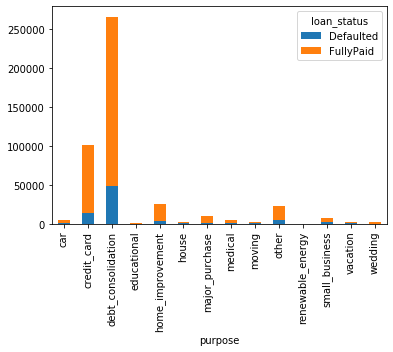

In [90]:
purposebincounts.plot(kind='bar', stacked=True)

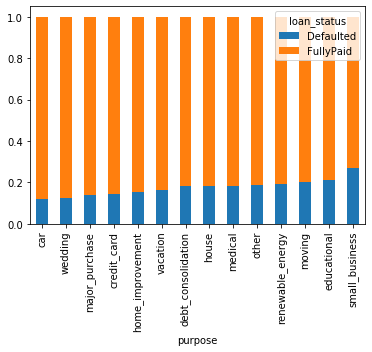

In [93]:
purposeprop.sort_values('Defaulted').plot(kind='bar', stacked = True)

In [95]:
safepurps = ['car', 'wedding', 'major_purchase', 'credit_card', 'home_improvement']
riskpurps = ['moving', 'educational', 'small_business']

## Defining return% metric to standardize returns per loan

In [111]:
accepted['return%'] = (accepted['total_pymnt']/accepted['funded_amnt']) * 100

In [112]:
accepted[['funded_amnt', 'total_pymnt', 'return%']]

,funded_amnt,total_pymnt,return%
0,10400.0,6611.690000,63.573942
1,15000.0,17392.370000,115.949133
2,9600.0,9973.430000,103.889896
3,7650.0,2281.980000,29.829804
4,21425.0,25512.200000,119.076779
...,...,...,...
453642,20500.0,26176.440002,127.689951
453643,15000.0,18790.720008,125.271467
453644,35000.0,44272.939984,126.494114
453645,12000.0,2077.190000,17.309917


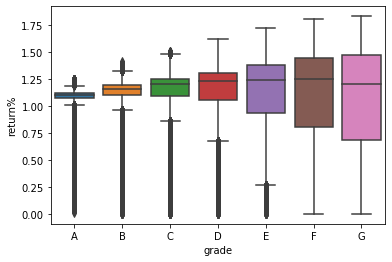

In [107]:
ax = sns.boxplot(x="grade", y="return%", data=accepted, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

## First portfolio selects loans at random, no filtering or weighting at all

In [222]:
random_port = accepted.sample(n = 140)
random_port_view = random_port[['id', 'purpose', 'grade', 'term', 'return%']]
print('Overall Return %:', round(sum(random_port['total_pymnt'])/sum(random_port['funded_amnt']) * 100, 2))
print('__' * 15)
print('Average Return % by Grade:') 
print(random_port.groupby('grade').agg({'return%' : 'mean'}))
print('__' * 15)
print('Average Return % by Purpose:') 
print(random_port.groupby('purpose').agg({'return%' : 'mean'}))


Overall Return %: 114.16
______________________________
Average Return % by Grade:
          return%
grade            
A      110.675926
B      109.414654
C      112.271606
D      108.033647
E      125.203712
F      115.728840
G      163.066300
______________________________
Average Return % by Purpose:
                       return%
purpose                       
car                 123.687649
credit_card         109.793572
debt_consolidation  112.081454
home_improvement    106.584889
house               113.141753
major_purchase      113.849927
medical             120.561724
other                71.480771
small_business      132.066632
vacation            123.318322


In [223]:
random_port_view

,id,purpose,grade,term,return%
110440,20752661,debt_consolidation,B,36 months,113.242188
93839,23333495,debt_consolidation,C,36 months,121.223002
80761,25307805,debt_consolidation,E,36 months,127.244179
132545,18515246,debt_consolidation,C,60 months,135.819952
361835,5064992,medical,E,36 months,136.533614
...,...,...,...,...,...
74359,26180247,debt_consolidation,F,60 months,124.936583
19850,34813301,debt_consolidation,A,36 months,112.966904
375597,3931505,debt_consolidation,F,60 months,115.786553
145023,16413026,debt_consolidation,C,36 months,120.856500


## Next portfolio samples equally between grades; 20 loans from each, but random otherwise

In [133]:
stratified_port = accepted.groupby('grade', as_index = False).apply(lambda x: x.sample(n=20))
stratified_port_view = stratified_port[['id', 'purpose', 'grade', 'term', 'return%']]
print('Overall Return %:', round(sum(stratified_port['total_pymnt'])/sum(stratified_port['funded_amnt']) * 100, 2))
print('__' * 15)
print('Average Return % by Grade:') 
print(stratified_port.groupby('grade').agg({'return%' : 'mean'}))
print('__' * 15)
print('Average Return % by Purpose:') 
print(stratified_port.groupby('purpose').agg({'return%' : 'mean'}))

Overall Return %: 110.9
______________________________
Average Return % by Grade:
          return%
grade            
A      102.624320
B      114.308039
C      116.385333
D      108.146607
E      112.060461
F      118.545667
G      112.381014
______________________________
Average Return % by Purpose:
                       return%
purpose                       
car                  75.827685
credit_card         114.015031
debt_consolidation  109.623653
home_improvement    120.436776
house               106.904000
major_purchase      123.787393
medical             128.017654
other               114.408341
small_business      124.501572
vacation            114.860263


## Conservative portfolio only samples from grades A and B (90 and 50 respectively). Only loans in the "safe purposes" list, below the safe interest rate, above the risky FICO level, and only 36 month terms allowed.

In [224]:
conservative_df = accepted[accepted['grade'].isin(['A', 'B'])]
conservative_df = conservative_df[conservative_df['purpose'].isin(safepurps)]
conservative_df = conservative_df[conservative_df['int_rate'] < safeint]
conservative_df = conservative_df[conservative_df['fico_mid'] > riskfico]
conservative_df = conservative_df[conservative_df['term'] == ' 36 months']
conA = conservative_df[conservative_df['grade'] == 'A'].sample(n = 90)
conB = conservative_df[conservative_df['grade'] == 'B'].sample(n = 50)
conservative_port = pd.concat([conA, conB])
conservative_port_view = conservative_port[['id', 'purpose', 'grade', 'term', 'return%']]
print('Overall Return %:', round(sum(conservative_port['total_pymnt'])/sum(conservative_port['funded_amnt']) * 100, 2))
print('__' * 15)
print('Average Return % by Grade:') 
print(conservative_port.groupby('grade').agg({'return%' : 'mean'}))
print('__' * 15)
print('Average Return % by Purpose:') 
print(conservative_port.groupby('purpose').agg({'return%' : 'mean'}))

Overall Return %: 108.93
______________________________
Average Return % by Grade:
          return%
grade            
A      106.822122
B      111.088522
______________________________
Average Return % by Purpose:
                     return%
purpose                     
car               107.659842
credit_card       107.592893
home_improvement  110.187860
major_purchase    110.289779
wedding           105.917056


## Moderate portfolio, takes from grades A,  B, C and D (50, 40, 30, 20). It only makes sure the purpose is NOT in the risky purpose list. IT keeps the int rate below risk int, and still restricts to 36 months

In [225]:
moderate_df = accepted[accepted['grade'].isin(['A', 'B', 'C', 'D'])]
moderate_df = moderate_df[~moderate_df['purpose'].isin(riskpurps)]
moderate_df = moderate_df[moderate_df['int_rate'] < riskint]
moderate_df = moderate_df[moderate_df['term'] == ' 36 months']
modA = moderate_df[moderate_df['grade'] == 'A'].sample(n = 50)
modB = moderate_df[moderate_df['grade'] == 'B'].sample(n = 40)
modC = moderate_df[moderate_df['grade'] == 'C'].sample(n = 30)
modD = moderate_df[moderate_df['grade'] == 'D'].sample(n = 20)
moderate_port = pd.concat([modA, modB, modC, modD])
moderate_port_view = moderate_port[['id', 'purpose', 'grade', 'term', 'return%']]
print('Overall Return %:', round(sum(moderate_port['total_pymnt'])/sum(moderate_port['funded_amnt']) * 100, 2))
print('__' * 15)
print('Average Return % by Grade:') 
print(moderate_port.groupby('grade').agg({'return%' : 'mean'}))
print('__' * 15)
print('Average Return % by Purpose:') 
print(moderate_port.groupby('purpose').agg({'return%' : 'mean'}))

Overall Return %: 109.31
______________________________
Average Return % by Grade:
          return%
grade            
A      107.088553
B      109.575181
C      108.048214
D      115.179728
______________________________
Average Return % by Purpose:
                       return%
purpose                       
credit_card         108.876890
debt_consolidation  108.951961
home_improvement    115.629632
major_purchase      113.832628
medical             113.532565
other                91.669223


## Risky Portfolio samples from all Grades (10, 10, 30, 25, 25, 20, 20 respectively), it does not restrict based on risk measures.

In [168]:
risky_df = accepted.copy()
riskA = risky_df[risky_df['grade'] == 'A'].sample(n = 10)
riskB = risky_df[risky_df['grade'] == 'B'].sample(n = 10)
riskC = risky_df[risky_df['grade'] == 'C'].sample(n = 30)
riskD = risky_df[risky_df['grade'] == 'D'].sample(n = 25)
riskE = risky_df[risky_df['grade'] == 'E'].sample(n = 25)
riskF = risky_df[risky_df['grade'] == 'F'].sample(n = 20)
riskG = risky_df[risky_df['grade'] == 'G'].sample(n = 20)
risky_port = pd.concat([riskA, riskB, riskC, riskD, riskE, riskF, riskG])
risky_port_view = risky_port[['id', 'purpose', 'grade', 'term', 'return%']]
print('Overall Return %:', round(sum(risky_port['total_pymnt'])/sum(risky_port['funded_amnt']) * 100, 2))
print('__' * 15)
print('Average Return % by Grade:') 
print(risky_port.groupby('grade').agg({'return%' : 'mean'}))
print('__' * 15)
print('Average Return % by Purpose:') 
print(risky_port.groupby('purpose').agg({'return%' : 'mean'}))

Overall Return %: 117.39
______________________________
Average Return % by Grade:
          return%
grade            
A      107.642118
B      108.583465
C      114.979442
D      122.154338
E      113.296819
F      117.605682
G      106.827178
______________________________
Average Return % by Purpose:
                       return%
purpose                       
car                 117.648048
credit_card         112.128612
debt_consolidation  111.051932
home_improvement    120.462583
house               122.223658
major_purchase      106.395947
moving               69.617411
other               127.478578
small_business      157.630487


## Wild Portfolio only samples from E, F, and G loans (35, 50, and 55). It only takes loans from the risky purposes, higher than the risky interest threshold, and lower than the risky fico threshold

In [257]:
wild_df = accepted[accepted['grade'].isin(['E', 'F', 'G'])]
wild_df = wild_df[wild_df['purpose'].isin(riskpurps)]
wild_df = wild_df[wild_df['int_rate'] > riskint]
wild_df = wild_df[wild_df['fico_mid'] < riskfico]
wildE = wild_df[wild_df['grade'] == 'E'].sample(n = 35)
wildF = wild_df[wild_df['grade'] == 'F'].sample(n = 50)
wildG = wild_df[wild_df['grade'] == 'G'].sample(n = 55)
wild_port = pd.concat([wildE, wildF, wildG])
wild_port_view = wild_port[['id', 'purpose', 'grade', 'term', 'return%']]
print('Overall Return %:', round(sum(wild_port['total_pymnt'])/sum(wild_port['funded_amnt']) * 100, 2))
print('__' * 15)
print('Average Return % by Grade:') 
print(wild_port.groupby('grade').agg({'return%' : 'mean'}))
print('__' * 15)
print('Average Return % by Purpose:') 
print(wild_port.groupby('purpose').agg({'return%' : 'mean'}))

Overall Return %: 113.24
______________________________
Average Return % by Grade:
          return%
grade            
E       98.998249
F      118.242803
G      120.793370
______________________________
Average Return % by Purpose:
                   return%
purpose                   
educational     148.610030
moving          125.894786
small_business  109.558288


## This series of cells generates 100 of each portfolio and stores its overall return, then we boxplot the result

In [179]:
i = 0
randomlist = []
while i < 100:
    random_port = accepted.sample(n = 140)
    randomreturn = round(sum(random_port['total_pymnt'])/sum(random_port['funded_amnt']) * 100, 2)
    randomlist.append(randomreturn)
    i += 1

In [181]:
i = 0
stratifiedlist = []
while i < 100:
    stratified_port = accepted.groupby('grade', as_index = False).apply(lambda x: x.sample(n=20))
    stratifiedreturn = round(sum(stratified_port['total_pymnt'])/sum(stratified_port['funded_amnt']) * 100, 2)
    stratifiedlist.append(stratifiedreturn)
    i += 1

In [210]:
i = 0
conservativelist = []
while i < 100:    
    conA = conservative_df[conservative_df['grade'] == 'A'].sample(n = 90)
    conB = conservative_df[conservative_df['grade'] == 'B'].sample(n = 50)
    conservative_port = pd.concat([conA, conB])
    conservativereturn = round(sum(conservative_port['total_pymnt'])/sum(conservative_port['funded_amnt']) * 100, 2)
    conservativelist.append(conservativereturn)
    i += 1

In [183]:
i = 0
moderatelist = []
while i < 100:
    modA = moderate_df[moderate_df['grade'] == 'A'].sample(n = 50)
    modB = moderate_df[moderate_df['grade'] == 'B'].sample(n = 40)
    modC = moderate_df[moderate_df['grade'] == 'C'].sample(n = 30)
    modD = moderate_df[moderate_df['grade'] == 'D'].sample(n = 20)
    moderate_port = pd.concat([modA, modB, modC, modD])
    moderatereturn = round(sum(moderate_port['total_pymnt'])/sum(moderate_port['funded_amnt']) * 100, 2)
    moderatelist.append(moderatereturn)
    i += 1

In [184]:
i = 0
riskylist = []
while i < 100:
    riskA = risky_df[risky_df['grade'] == 'A'].sample(n = 10)
    riskB = risky_df[risky_df['grade'] == 'B'].sample(n = 10)
    riskC = risky_df[risky_df['grade'] == 'C'].sample(n = 30)
    riskD = risky_df[risky_df['grade'] == 'D'].sample(n = 25)
    riskE = risky_df[risky_df['grade'] == 'E'].sample(n = 25)
    riskF = risky_df[risky_df['grade'] == 'F'].sample(n = 20)
    riskG = risky_df[risky_df['grade'] == 'G'].sample(n = 20)
    risky_port = pd.concat([riskA, riskB, riskC, riskD, riskE, riskF, riskG])
    riskyreturn = round(sum(risky_port['total_pymnt'])/sum(risky_port['funded_amnt']) * 100, 2)
    riskylist.append(riskyreturn)
    i += 1

In [211]:
i = 0
wildlist = []
while i < 100:
    wildE = wild_df[wild_df['grade'] == 'E'].sample(n = 35)
    wildF = wild_df[wild_df['grade'] == 'F'].sample(n = 50)
    wildG = wild_df[wild_df['grade'] == 'G'].sample(n = 55)
    wild_port = pd.concat([wildE, wildF, wildG])
    wildreturn = round(sum(wild_port['total_pymnt'])/sum(wild_port['funded_amnt']) * 100, 2)
    wildlist.append(wildreturn)
    i += 1

In [212]:
combined_simulation = {'Random' : randomlist, 'Stratified' : stratifiedlist, 'Conservative' : conservativelist,
                      'Moderate' : moderatelist, 'Risky' : riskylist, 'Wild' : wildlist}

In [213]:
simulation_df = pd.DataFrame(data = combined_simulation)

In [245]:
max(simulation_df['Stratified'])

122.28

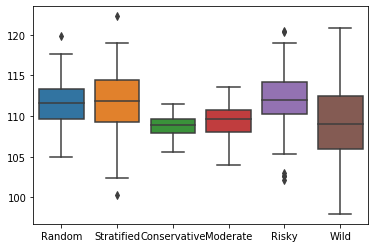

In [216]:
ax = sns.boxplot(data=simulation_df)